In [1]:
class BNode:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None

In [6]:
def preOrderPrint(root):
    if root != None:
        print(root.val, end = ' ')
        preOrderPrint(root.left)
        preOrderPrint(root.right)

In [22]:
def ConstructCore(preOrder, inOrder):
    if preOrder == None or len(preOrder) == 0:
        return None
    if len(preOrder) == 1 or len(inOrder) == 1:
        if len(preOrder) ==  len(inOrder) and preOrder[0] == inOrder[0]:
            return BNode(preOrder[0])
        else:
            raise RuntimeError("The preOrder: {} unmatched the inOrder: {}".format(str(preOrder), str(inOrder)))
    
    p_val = preOrder[0]; mid = 0
    while mid != len(inOrder):
        if inOrder[mid] == p_val: break
        mid += 1
    root = BNode(p_val)
    if mid > 0:
        root.left = ConstructCore(preOrder[1:mid+1], inOrder[:mid])
    if mid+1 < len(preOrder):
        root.right = ConstructCore(preOrder[mid+1:], inOrder[mid+1:])
    return root

p = [1,2,4,7,3,5,6,8] 
i = [4,7,2,1,5,3,8,6]
root = ConstructCore(p, i)
preOrderPrint(root)

1 2 4 7 3 5 6 8 

In [37]:

def PrintNext(root, val, flag=0):
    ret = None
    if flag ==2 :
        pass
    else :
        if root.left:
            flag, ret = PrintNext(root.left, val, flag)
        if root.val == val:
            flag = 1
        elif flag == 1:
            #print("next node ",root.val)
            ret = root.val
            flag = 2
        if root.right:
            flag2, ret2 = PrintNext(root.right, val, flag) 
            flag = max(flag, flag2)
            if ret == None:
                ret = ret2
    return flag, ret
for i in range(1,9):
    print(i, end=' ')
    print(PrintNext(root, i))
    

1 (2, 5)
2 (2, 1)
3 (2, 8)
4 (2, 7)
5 (2, 3)
6 (1, None)
7 (2, 2)
8 (2, 6)


In [22]:
def rotateString(A, B):
    """
    :type A: str
    :type B: str
    :rtype: bool
    """
    if not A and not B:
        return True
    if not A and B != None:
        return False
    if A != None and not B:
        return False

    na = len(A)
    nb = len(B)

    if na != nb:
        return False

    start = 0
    i = 0

    while start < nb:

        while start < na and start < nb:
            if A[0] == B[start]:
                break
            start += 1
        if start == na or (start == nb):
            print('start==na')
            break
        count = 0
        print(start)
        for i in range(1, na):
            print(A[i] ,B[(start+i)%nb])
            if A[i] != B[(start+i)%nb]:
                break
            count += 1
        start += 1

        if count == na-1:
            return True
        count = 0
    return False
A = ""
B = ""
rotateString(A, B)

True

In [24]:
ord('\0')

0

In [32]:
hab = dict(a=0,b=0)
for sym in ['a','b']:
    hab[sym] += 1
for sym, ss in zip(['a','b'],['123','456']):
    print(hab[sym],ss)

1 123
1 456


In [111]:
def GetNext(p):
    plen = len(p)
    next = [-1] * plen
    k = -1; j = 0
    count = 0
    total = 0 
    while j < plen -1:
        if k == -1 or p[k] == p[j]:
            k += 1
            j += 1
            next[j] = k
            print("",end='\t'*4)
        else:
            print(p[:k+1], p[j-k:j+1],"\tj = %d back: %d -> %d"%(j, k, next[k]), end='\t')
            count += 1
            k = next[k]
        total += 1
        print('next: '+' '.join([str(i) for i in next]).replace('-1','_'))
    print("count = %d"%(count))
    print("total = %d"%(total))
    return next

In [114]:
def GetNext2(p):
    plen = len(p)
    next = [-1] * plen
    k = -1; j = 0
    count = 0
    total = 0 
    while j < plen -1:
        if k == -1 or p[k] == p[j]:
            k += 1
            j += 1
            if p[j] != p[k]:
                next[j] = k
            else:
                next[j] = next[k]
            print("",end='\t'*4)
            
        else:
            print(p[:k+1], p[j-k:j+1],"\tj = %d back: %d -> %d"%(j, k, next[k]), end='\t')
            count += 1
            k = next[k]
        total += 1
        print('next: '+' '.join([str(i) for i in next]).replace('-1','_'))
    print("count = %d"%(count))
    print("total = %d"%(total))
    return next

In [115]:
a=''
for i in range(6):
    for j in range(i):
        a += chr(j+97)
print(a)
print(len(a))

aababcabcdabcde
15


In [117]:
next = GetNext2(a)

				next: _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
				next: _ _ 1 _ _ _ _ _ _ _ _ _ _ _ _
aa ab 	j = 2 back: 1 -> -1	next: _ _ 1 _ _ _ _ _ _ _ _ _ _ _ _
				next: _ _ 1 _ _ _ _ _ _ _ _ _ _ _ _
				next: _ _ 1 _ 1 _ _ _ _ _ _ _ _ _ _
aa ab 	j = 4 back: 1 -> -1	next: _ _ 1 _ 1 _ _ _ _ _ _ _ _ _ _
				next: _ _ 1 _ 1 0 _ _ _ _ _ _ _ _ _
a c 	j = 5 back: 0 -> -1	next: _ _ 1 _ 1 0 _ _ _ _ _ _ _ _ _
				next: _ _ 1 _ 1 0 _ _ _ _ _ _ _ _ _
				next: _ _ 1 _ 1 0 _ 1 _ _ _ _ _ _ _
aa ab 	j = 7 back: 1 -> -1	next: _ _ 1 _ 1 0 _ 1 _ _ _ _ _ _ _
				next: _ _ 1 _ 1 0 _ 1 0 _ _ _ _ _ _
a c 	j = 8 back: 0 -> -1	next: _ _ 1 _ 1 0 _ 1 0 _ _ _ _ _ _
				next: _ _ 1 _ 1 0 _ 1 0 0 _ _ _ _ _
a d 	j = 9 back: 0 -> -1	next: _ _ 1 _ 1 0 _ 1 0 0 _ _ _ _ _
				next: _ _ 1 _ 1 0 _ 1 0 0 _ _ _ _ _
				next: _ _ 1 _ 1 0 _ 1 0 0 _ 1 _ _ _
aa ab 	j = 11 back: 1 -> -1	next: _ _ 1 _ 1 0 _ 1 0 0 _ 1 _ _ _
				next: _ _ 1 _ 1 0 _ 1 0 0 _ 1 0 _ _
a c 	j = 12 back: 0 -> -1	next: _ _ 1 _ 1 0 _ 1 0 0 _ 1 0 _ _
				next: _ _ 1 _ 1 0 

In [126]:
def modexp(a,b,n):
    ret = 1; 
    while b:
        if b & 1:
            ret = ret * a % n
        a = a * a % n
        b >>= 1
    return ret
modexp(2,10000,3)

1

In [142]:
class TreeNode():
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

In [143]:
def prePrint(root):
    print(root.val, end=' ')
    if root.left:
        prePrint(root.left)
    if root.right:
        prePrint(root.right)

In [162]:
root = TreeNode(1)
root.left = TreeNode(2)
prePrint(root)

1 2 

In [163]:
def invertTree(root):
    """
    :type root: TreeNode
    :rtype: TreeNode
    """
    if not root:
        print('123')
        return None

    if root.left and root.right:
        tmp = root.left
        root.left = root.right
        root.right = tmp
        root.left = invertTree(root.left)
        root.right = invertTree(root.right)
    else:
        if root.left:
            root.left = invertTree(root.left)
            root.right = root.left
            root.left = None
            print(root.left, root.right)
        elif root.right:
            root.right = invertTree(root.right)
            root.left = root.right
            root.right = None
    print(root.left, root.right)
    return root

In [164]:
root2 = invertTree(root)

None None
None <__main__.TreeNode object at 0x00000000057BD470>
None None
<__main__.TreeNode object at 0x00000000057BD470> None


In [159]:
root2.left

In [174]:
word = "Bob hit a ball, the\' hit, BALL. flew! far; after? it was hit."

In [178]:
def mostCommonWord(paragraph, banned):
    """
    :type paragraph: str
    :type banned: List[str]
    :rtype: str
    """
    counter = collections.Counter(filter(lambda v: v not in "!?',;.", paragraph.lower()).split())
    banned = set(banned)
    return sorted({k: v for k, v in counter.items() if k not in banned}.items(), key=lambda v: v[1], reverse=True)[0][0]

In [183]:
collections.Counter(filter(lambda v: v not in "!?',;.", word.lower()).split())

NameError: name 'collections' is not defined

In [187]:
b= ["a1b2", "a1B2", "A1b2", "A1B2"]

In [202]:
def letterCasePermutation(S):
    """
    :type S: str
    :rtype: List[str]
    """
    mylist = []
    numChars = set([str(i) for i in range(10)])
    s = [i for i in S]
    for i, si in enumerate(S):
        if si not in numChars:
            mylist.append(i)

    ret = []

    mylen = len(mylist)
    total = 1 << mylen
    
    for flag in range(total):
        tmp = flag
        ptr = mylen - 1
        while tmp:
            idx = mylist[ptr]
            if tmp & 1: #lower
                print(s[idx])
                s[idx] = s[idx].upper()
            else: #upper
                print("upper")
                s[idx] = s[idx].lower()
            ptr -= 1
            tmp >>= 1
        ret.append(''.join(s))

    return ret
letterCasePermutation('C')

C


['C', 'C']

In [210]:
import time

In [267]:
def getArea(p1, p2, p3):
    area = -1
    s1 = pow((p1[0] - p2[0]) ** 2 +(p1[1] - p2[1]) ** 2, 0.5)
    s2 = pow((p1[0] - p3[0]) ** 2 +(p1[1] - p3[1]) ** 2, 0.5)
    s3 = pow((p2[0] - p3[0]) ** 2 +(p2[1] - p3[1]) ** 2, 0.5)
    if s1 + s2 <= s3 or s1 + s3 <= s2 or s2 + s3 <= s1:
        pass
    else:
        area = 0.25 * pow((s1+s2+s3) * (s1+s2-s3) * (s1-s2+s3) * (-s1+s2+s3), 0.5)
    return area

def getArea2(a, b, c):
    ab = [b[i] -  a[i] for i in [0,1]]
    ac = [c[i] -  a[i] for i in [0,1]]
    cross = ab[0] * ac[1] - ab[1] * ac[0]
    return cross


In [268]:
def largestTriangleArea(points):
    """
    :type points: List[List[int]]
    :rtype: float
    """
    if not points:
        return 0.0
    pLen = len(points)

    max_s = 0.0
    ret = []
    for i in range(pLen):
        for j in range(i+1, pLen):
            for k in range(j+1, pLen):
                p1, p2, p3 = [points[ii] for ii in [i,j,k]]
                s = getArea2(p1, p2, p3)
                if s > max_s:
                    max_s = s
                    ret = [p1,p2,p3]
    print(ret)
    return max_s

In [269]:
def largestTriangleArea_org(points):
    """
    :type points: List[List[int]]
    :rtype: float
    """
    if not points:
        return 0.0
    pLen = len(points)

    max_s = 0.0
    ret = []
    from math import sqrt

    for i in range(pLen):
        for j in range(i+1, pLen):

            for k in range(j+1, pLen):

                a,b,c = [points[ii] for ii in [i,j,k]]
                s1 = sqrt( (a[0] - b[0])**2 + (a[1] - b[1])**2)
                s2 = sqrt( (a[0] - c[0])**2 + (a[1] - c[1])**2)
                s3 = sqrt( (b[0] - c[0])**2 + (b[1] - c[1])**2)
                if s1 * s2 * s3 == 0:
                    continue
                if s1 + s2 <= s3 or s1 + s3 <= s2 or s2 + s3 <= s1:
                    continue
                s = 0.25 * sqrt((s1+s2+s3) * (s1+s2-s3) * (s1-s2+s3) * (-s1+s2+s3))
                if s > max_s:
                    max_s = s
                    ret = [a,b,c]
    print(ret)
    return max_s

In [270]:
points = [[50,12],[0,8],[20,-12],[-32,-34],[-46,-9],[35,49],[35,-37],[-32,28],[0,-13],[17,-43],[-25,2],[-37,-28],[-14,-34],[-47,25],[-6,20],[9,22],[-7,-9],[17,-10],[-24,29],[-41,21],[-32,15],[-12,35],[15,48],[-18,-26],[-27,-28],[-18,-7],[-16,-24],[10,11],[-27,45],[6,-40],[33,-12],[-48,-42],[11,37],[-26,1],[25,40],[4,27],[-2,-9],[29,32],[5,34],[1,-35],[-49,23],[27,2],[13,14],[-44,8],[-45,11],[-16,-41],[38,-43],[-16,11],[-10,35],[-3,-27]]

In [271]:
start = time.clock()
s = largestTriangleArea_org(points)
print(s)
elapsed = time.clock() - start
print("Time used ", elapsed)

[[35, 49], [-48, -42], [38, -43]]
3954.5000000000005
Time used  0.12752805713353155


In [272]:
start = time.clock()
s = largestTriangleArea(points)
print(s/2.0)
elapsed = time.clock() - start
print("Time used ", elapsed)

[[35, 49], [-48, -42], [38, -43]]
3954.5
Time used  0.05762849374650614


In [392]:
import math
import numpy as np
import matplotlib.pyplot as plt


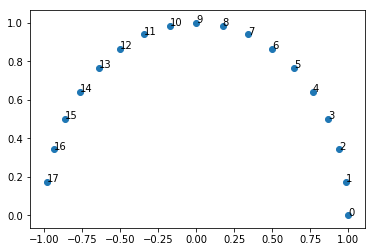

In [402]:

test = []
for i in range(0, 180,10):
    y = math.sin(i/180 * math.pi)
    x = math.cos(i/180 * math.pi)
    test.append([x,y])
def draw_point(data, convex = None):
    test = [[d[i] for d in data] for i in [0,1]]
    fig, ax = plt.subplots()
    ax.scatter(test[0], test[1])
    n = [i for i in range(len(data))]
    for i,txt in enumerate(n):
        ax.annotate(txt, (test[0][i], test[1][i]))
    if convex != None:
        for i in range(0, len(convex)-1):
            xs, yx = [[convex[i][j], convex[i+1][j]] for j in [0,1]]
            ax.plot(xs, yx)
    plt.show()
    
draw_point(test)

[[0, 0], [2, 0], [1, 0], [0, 1], [0, 2]]
[0, 1]
[4, 0, 1]


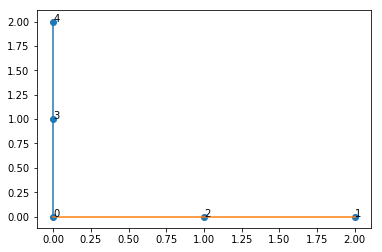

In [434]:
from math import sqrt, asin
class ConvexHull():
    def getAngle(self, p):
        dx = p[0] - self.p0[0]
        dy = p[1] - self.p0[1]
#         if dy < 0:
#             dx = -abs(dx)
        assert dy >= 0, "The y of p should bigger than that of p0"
        plen = sqrt(dx ** 2 + dy ** 2)
        return acos(dx / (plen + 1e-12))
    
    def isLeft(self, o, a, b):
        #等于0是共线，大于零左旋
        aoX = a[0] - o[0]
        aoY = a[1] - o[1]
        baX = b[0] - a[0]
        baY = b[1] - a[1]
        return aoX * baY - aoY * baX
    def smaller(self, p1, p2):
        a = [p1[i] - self.p0[i] for i in [0, 1]]
        b = [p2[i] - self.p0[i] for i in [0, 1]]
        ma = a[0] **2 + a[1] **2
        mb = b[0] **2 + b[1] **2
        return ma < mb
        
    def Melkman(self, points):
        

        #交换拥有最小y值得点px 与 p(-1)
        plen = len(points)
        min_i = 0; i =1
        while i < plen:
            if points[i][1] < points[min_i][1]:
                min_i = i
            i += 1
        
        self.p0  = points[min_i]
        points[min_i] = points[0]
        points[0] = self.p0
        
        #以p0为坐标原点，建立坐标系, 根据每个点的角度排序
        points[1:] = sorted(points[1:], key=lambda p: self.getAngle(p))
        print(points)
        N = len(points)
        bot = N-1
        top = N
        D = [0]*2*N #数据索引， 双向表
        D[top] = 0; top += 1
        D[top] = 1; top += 1
        
        #第三个点p2 不能与前两个点p0,p1共线, 否则第二个点p1外延
        p2_i = 2
        while p2_i < N:
            if self.isLeft(points[D[top-2]], points[D[top-1]], points[p2_i]) != 0:
                break
            #共线，将第二个点替换为更远的点
            if self.smaller(points[D[top-1]], points[D[p2_i]]) == True:
                D[top - 1] = p2_i    
            p2_i += 1
            
        print(D[N:N+2])
        D[bot] = p2_i; bot -= 1
        D[top] = p2_i; top += 1
        #top = N+ 3  bot = N - 2
        #所有点都是按角度排列的，所以依次选择
        i = p2_i + 1
        while i < N:
            if self.isLeft(points[D[top-2]], points[D[top-1]], points[i]) > 0 and \
            self.isLeft(points[D[bot+1]], points[D[bot+2]], points[i]) > 0 :
                continue #i在包内，跳过
            while self.isLeft(points[D[top-2]], points[D[top-1]], points[i]) <= 0:
                top -= 1 # 正向表非左转， top端出队
            D[top] = i; top += 1 #合法的入队
            
            while self.isLeft(points[D[bot+1]], points[D[bot+2]], points[i]) <= 0 :
                bot += 1 # 反向表非左转， bot端出队
            D[bot] = i; bot -= 1
            
            i+= 1
        ret_idx = D[bot+1 : top-1]
        print(ret_idx)
        ret = [points[i] for i in ret_idx]
        return ret
        
            
#np.random.seed(0)
random_points = (np.random.random_sample([50,2]) - 0.5)
random_points = [[i,j] for i,j in random_points]
#draw_point(random_points)
random_points = [[0,0],[0,1],[1,0],[0,2],[2,0]]
c = ConvexHull()
ret = c.Melkman(random_points)
draw_point(random_points, ret)


In [437]:
from math import sqrt, acos
class Solution:
    
    def getAngle(self, p):
        dx = p[0] - self.p0[0]
        dy = p[1] - self.p0[1]
        assert dy >= 0, "The y of p should bigger than that of p0"
        plen = sqrt(dx ** 2 + dy ** 2)
        return acos(dx / (plen + 1e-12))
    
    def isLeft(self, o, a, b):
        #等于0是共线，大于零左旋
        aoX = a[0] - o[0]
        aoY = a[1] - o[1]
        baX = b[0] - a[0]
        baY = b[1] - a[1]
        return aoX * baY - aoY * baX
    
    def smaller(self, p1, p2):
        a = [p1[i] - self.p0[i] for i in [0, 1]]
        b = [p2[i] - self.p0[i] for i in [0, 1]]
        ma = a[0] **2 + a[1] **2
        mb = b[0] **2 + b[1] **2
        return ma < mb
    
    def Melkman(self, points):
        #交换拥有最小y值得点px 与 p(-1)
        plen = len(points)
        min_i = 0; i =1
        while i < plen:
            if points[i][1] < points[min_i][1]:
                min_i = i
            i += 1
        
        self.p0  = points[min_i]
        points[min_i] = points[0]
        points[0] = self.p0
        
        #以p0为坐标原点，建立坐标系, 根据每个点的角度排序
        points[1:] = sorted(points[1:], key=lambda p: self.getAngle(p))
        
        N = len(points)
        bot = N-1
        top = N
        D = [0]*2*N #数据索引， 双向表
        D[top] = 0; top += 1
        D[top] = 1; top += 1
        
        #第三个点p2 不能与前两个点p0,p1共线, 否则第二个点p1外延
        p2_i = 2
        while p2_i < N:
            
            if self.isLeft(points[D[top-2]], points[D[top-1]], points[p2_i]) != 0:
                break
            #共线，将第二个点替换为更远的点
            if self.smaller(points[D[top-1]], points[D[p2_i]]) == True:
                D[top - 1] = p2_i
            p2_i += 1
            
        D[bot] = p2_i; bot -= 1
        D[top] = p2_i; top += 1
        #top = N+ 3  bot = N - 2
        #所有点都是按角度排列的，所以依次选择
            
        i = p2_i + 1
        while i < N:
            if self.isLeft(points[D[top-2]], points[D[top-1]], points[i]) > 0 and \
            self.isLeft(points[D[bot+1]], points[D[bot+2]], points[i]) > 0 :
                continue #i在包内，跳过
            while self.isLeft(points[D[top-2]], points[D[top-1]], points[i]) <= 0:
                top -= 1 # 正向表非左转， top端出队
            D[top] = i; top += 1 #合法的入队
            
            while self.isLeft(points[D[bot+1]], points[D[bot+2]], points[i]) <= 0 :
                bot += 1 # 反向表非左转， bot端出队
            D[bot] = i; bot -= 1
            
            i+= 1
        ret_idx = D[bot+1 : top-1]
        #print(ret_idx)
        ret = [points[i] for i in ret_idx]
        return ret
    
    def getArea(self, a, b, c):
        ab = [b[i] -  a[i] for i in [0,1]]
        ac = [c[i] -  a[i] for i in [0,1]]
        cross = ab[0] * ac[1] - ab[1] * ac[0]
        return cross
    def largestTriangleArea(self, points):
        """
        :type points: List[List[int]]
        :rtype: float
        """
        if not points:
            return 0.0
        
        points = self.Melkman(points)
        print(points)
        pLen = len(points)
        max_s = 0.0
        for i in range(pLen):
            for j in range(i+1, pLen):
                for k in range(j+1, pLen):
                    a,b,c = [points[ii] for ii in [i,j,k]]
                    print(a,b,c)
                    s=self.getArea(a,b,c)
                    max_s = max(max_s, s)
        return max_s
    
s = Solution()
points = [[0,0],[0,1],[1,0],[0,2],[2,0]]
s.largestTriangleArea(points)

[[0, 2], [0, 0], [2, 0]]
[0, 2] [0, 0] [2, 0]


4

In [369]:
random_points = (np.random.random_sample([20,2]) - 0.5)
[[i,j] for i,j in random_points]

[[-0.140492099426214, -0.06296804620065855],
 [0.19763119592726486, -0.43977452837073017],
 [0.16676671544566768, 0.1706378696181594],
 [-0.2896174389261591, -0.3710737023451467],
 [-0.18457164907581614, -0.1362892290573774],
 [0.07019677041787964, -0.06139848653767965],
 [0.4883738380592262, -0.39795518925197193],
 [-0.2911232439051653, -0.33869048211500374],
 [0.15310832546539843, -0.2467083974602179],
 [-0.03368922714369371, -0.25557440799839726],
 [-0.3410304163544803, -0.38962485883569487],
 [0.15632958946527342, -0.3618170486513862],
 [-0.3034176383199465, -0.1312748293390359],
 [0.3209932298479351, -0.40289872420693873],
 [0.3379449074988039, -0.40390159210603693],
 [0.47645946501339576, -0.031348798352298424],
 [0.47676108819033713, 0.10484551974504597],
 [0.23926357939830167, -0.4608122077456793],
 [-0.21719303742359042, -0.3798034387868311],
 [-0.20385980247785507, -0.38127228104575595]]

In [308]:
for ti in t:
    a = getAngle(ti)/pi
    print(ti, a)

[1.0, 0.0] 0.0
[0.984807753012208, 0.17364817766693033] 0.05555555555555542
[0.9396926207859084, 0.3420201433256687] 0.11111111111111108
[0.8660254037844387, 0.49999999999999994] 0.16666666666666663
[0.766044443118978, 0.6427876096865393] 0.22222222222222218
[0.6427876096865394, 0.766044443118978] 0.2777777777777778
[0.5000000000000001, 0.8660254037844386] 0.3333333333333333
[0.3420201433256688, 0.9396926207859083] 0.3888888888888889
[0.17364817766693041, 0.984807753012208] 0.4444444444444444
[6.123233995736766e-17, 1.0] 0.5
[-0.1736481776669303, 0.984807753012208] 0.5555555555555556
[-0.3420201433256687, 0.9396926207859084] 0.6111111111111112
[-0.4999999999999998, 0.8660254037844387] 0.6666666666666666
[-0.6427876096865394, 0.766044443118978] 0.7222222222222222
[-0.7660444431189779, 0.6427876096865395] 0.7777777777777778
[-0.8660254037844387, 0.49999999999999994] 0.8333333333333334
[-0.9396926207859083, 0.3420201433256689] 0.8888888888888891
[-0.984807753012208, 0.1736481776669307] 0.

In [310]:
a = [0,6,3,8,3,7,3,0]
a[1:].sort()
print(a)

[0, 6, 3, 8, 3, 7, 3, 0]
